In [142]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format

Listing = pd.read_csv('Listings.csv', low_memory=False)
Reviews = pd.read_csv('Reviews.csv')

Listing["Host_Since"] = pd.to_datetime(Listing["host_since"])
Listing["today"] = pd.to_datetime("2021-05-10")
Listing["Hosting_Age"] = np.round(((Listing["today"]- Listing["Host_Since"])/timedelta(days=365)),2)
Listing["Host_Since_Year"] = Listing["Host_Since"].dt.year

Listing = Listing.set_index('listing_id')
Reviews = Reviews.set_index('listing_id')
merged = Listing.merge(Reviews, how='outer', left_index=True, right_index=True)


In [146]:
merged1 = merged.drop(
    labels=['host_location','host_response_time','host_has_profile_pic','host_identity_verified','host_total_listings_count','host_response_rate','host_is_superhost','latitude','host_acceptance_rate','longitude','minimum_nights','maximum_nights','review_id','Host_Since','today','date','review_scores_cleanliness','review_scores_checkin','review_scores_communication'],
    axis=1,
    inplace=False
)

Airbnb = merged1.dropna(how = 'any',
                            subset = ['review_scores_rating','review_scores_location','review_scores_value'])
Airbnb.replace(np.nan,0)
Airbnb

,name,host_id,host_since,neighbourhood,district,city,property_type,room_type,accommodates,bedrooms,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,instant_bookable,Hosting_Age,Host_Since_Year,reviewer_id
listing_id,,,,,,,,,,,,,,,,,,,,
2577,Loft for 4 by Canal Saint Martin,2827,2008-09-09,Enclos-St-Laurent,NaN,Paris,Entire loft,Entire place,4,2.00,"[""Heating"", ""TV"", ""Iron"", ""Kitchen"", ""Essentia...",125,100.00,10.00,10.00,10.00,t,12.67,"2,008.00","28,047,930.00"
2595,Skylit Midtown Castle,2845,2008-09-09,Midtown,Manhattan,New York,Entire apartment,Entire place,2,NaN,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",100,94.00,9.00,10.00,9.00,f,12.67,"2,008.00","61,580,757.00"
2595,Skylit Midtown Castle,2845,2008-09-09,Midtown,Manhattan,New York,Entire apartment,Entire place,2,NaN,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",100,94.00,9.00,10.00,9.00,f,12.67,"2,008.00","165,354,250.00"
2595,Skylit Midtown Castle,2845,2008-09-09,Midtown,Manhattan,New York,Entire apartment,Entire place,2,NaN,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",100,94.00,9.00,10.00,9.00,f,12.67,"2,008.00","66,056,138.00"
2595,Skylit Midtown Castle,2845,2008-09-09,Midtown,Manhattan,New York,Entire apartment,Entire place,2,NaN,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",100,94.00,9.00,10.00,9.00,f,12.67,"2,008.00","60,181,725.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48229422,Departamento para Ejecutivo en el Sur de la CDMX,25705137,2015-01-06,A�lvaro Obregon,NaN,Mexico City,Entire apartment,Entire place,4,2.00,"[""Heating"", ""TV"", ""Dedicated workspace"", ""Sham...",970,100.00,10.00,10.00,10.00,f,6.35,"2,015.00","85,698,560.00"
48242873,Casai Polanco | 2BR | Stylish Flat,236301634,2019-01-13,Miguel Hidalgo,NaN,Mexico City,Entire apartment,Entire place,4,2.00,"[""TV"", ""Dedicated workspace"", ""Bed linens"", ""E...",1422,80.00,10.00,10.00,10.00,t,2.32,"2,019.00","63,831,673.00"
48255009,GALATA TOWER&VIEWS:Genuine Istanbul experience,375048822,2020-11-09,Beyoglu,NaN,Istanbul,Entire apartment,Entire place,8,3.00,"[""Dryer"", ""Hangers"", ""Long term stays allowed""...",313,100.00,10.00,10.00,10.00,f,0.50,"2,020.00","389,230,688.00"


In [124]:
Airbnb.bedrooms.mean()

1.451698073002033

In [123]:
Airbnb.replace(np.nan,0)
Airbnb.bedrooms.mean()

1.451698073002033

In [147]:
Airbnb.columns

Index(['name', 'host_id', 'host_since', 'neighbourhood', 'district', 'city',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'amenities',
       'price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'Hosting_Age', 'Host_Since_Year', 'reviewer_id'],
      dtype='object')

In [144]:
Airbnb.drop_duplicates(subset=["name"],keep=False,inplace=True #doja te delete duplicates me listing ID te njejte, ne vend te emrin. Esht e njejta gje? 

SyntaxError: unexpected EOF while parsing (<ipython-input-144-745ae6ff9ab8>, line 1)

In [148]:
Airbnb.duplicated().sum()

95281

In [151]:
Airbnb.replace(np.nan,0)
ND = Airbnb.drop_duplicates(subset=['name']) #the code suggested didn't work but this one did. Is this good? 
ND.duplicated().sum()

0

In [163]:
discard = ['Shared','room', 'Room', 'guesthouse', 'Farm stay', 'Boat', 'Entire floor', 'Camper/RV', 'Treehouse', 'Campsite', 'Cave', 'Train', 'Entire hostel', 'Tent', 'Yurt', 'Entire dorm', 'Bus', 'Entire in-law', 'Barn',
       'Hut', 'Lighthouse', 'Holiday park', 'Entire resort', 'Pension', 'Castle', 'Casa particular', 'Dome house', 'Island', 'Earth house', 'Houseboat', 'Entire cabin', 'Entire chalet', 'Entire cottage' ]
ND2 = ND[~ND.property_type.str.contains('|'.join(discard))]

ND2.pivot_table(values = 'review_scores_location', index = 'city', aggfunc=np.mean)

,review_scores_location
city,
Bangkok,9.29
Cape Town,9.76
Hong Kong,9.59
Istanbul,9.49
Mexico City,9.84
New York,9.67
Paris,9.69
Rio de Janeiro,9.79
Rome,9.64


Text(0.5, 0.98, 'Preferred cities based on review score location')

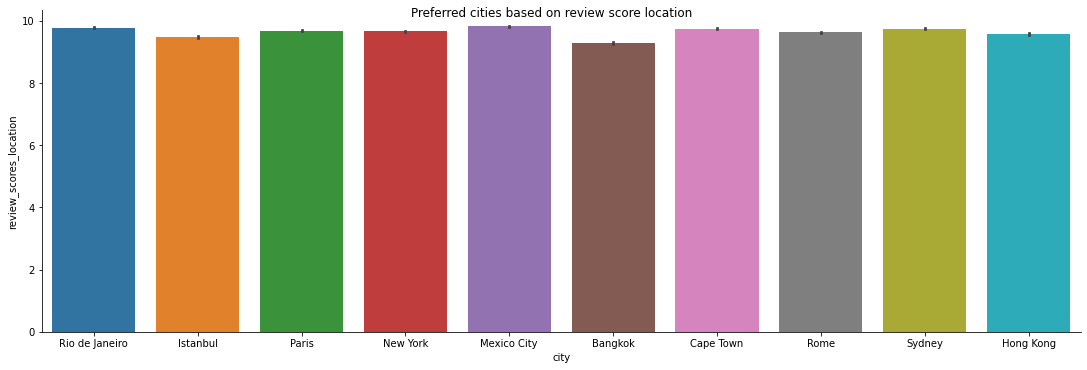

In [164]:
SC = ND2.sort_values(by='review_scores_location', ascending=True) #Ascending values? Si mund ta fokusoj Y nga 8 ne 10 qe te duket me mir ndryshimi? 
PRC = sns.catplot(x='city', y='review_scores_location', kind ='bar', data = SC, aspect=3)
PRC.set_xticklabels(rotation=360, horizontalalignment='center')
PRC.fig.suptitle('Preferred cities based on review score location')


In [183]:
Bangkok = SC.loc[(SC['city']=='Bangkok')]
Bangkok['property_type'].value_counts()

Entire apartment             3247
Entire condominium           2323
Entire house                  245
Entire townhouse              240
Entire serviced apartment     234
Entire loft                    65
Entire villa                   42
Entire guest suite             23
Entire place                   19
Entire home/apt                11
Tiny house                      8
Entire bungalow                 8
Entire bed and breakfast        6
Name: property_type, dtype: int64

In [195]:
df = Bangkok.groupby(['neighbourhood']).agg({'neighbourhood':['count']}).reset_index() #Count lisiting IDs per property type for each neighberhood. Esht ne rregull? 
df.head(10)

neighbourhood      
                   count
0         Bang Bon     1
1        Bang Kapi    91
2        Bang Khae    12
3        Bang Khen    25
4    Bang Kho laen    65
5  Bang Khun thain     5
6          Bang Na   238
7       Bang Phlat    58
8         Bang Rak   263
9         Bang Sue   122

<AxesSubplot:xlabel='neighbourhood'>

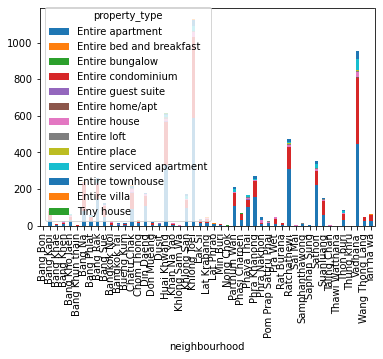

In [198]:
Bangkok.groupby(['neighbourhood','property_type'])['property_type'].count().unstack().plot(kind='bar', stacked = True) #Si mund ta fokusoj ne 12 lagjet me me shum lsiting IDs? Also, how can I make the columns wider? 


In [225]:
df2 = Bangkok.groupby(['Host_Since_Year']).agg({'Host_Since_Year':['count']}).reset_index() #Count lisiting IDs per property type for each neighberhood. Esht ne rregull? 
df2.head(10) #Cfar lloj visual esht me mir per kto te dhena? Scatterplot 

Host_Since_Year      
                  count
0        2,009.00     2
1        2,010.00    32
2        2,011.00    95
3        2,012.00   244
4        2,013.00   416
5        2,014.00   618
6        2,015.00  1217
7        2,016.00   972
8        2,017.00   885
9        2,018.00   922

In [229]:
df3 = Bangkok.groupby(['property_type']).agg({ 'price':['mean']}).reset_index()
df3.head(10)


,property_type,price
,,mean
0,Entire apartment,"1,534.84"
1,Entire bed and breakfast,"1,505.17"
2,Entire bungalow,"1,322.25"
3,Entire condominium,"1,383.53"
4,Entire guest suite,"1,950.52"
5,Entire home/apt,"1,054.64"
6,Entire house,"4,412.84"
7,Entire loft,"1,777.28"
8,Entire place,"1,494.74"


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<Figure size 432x288 with 0 Axes>

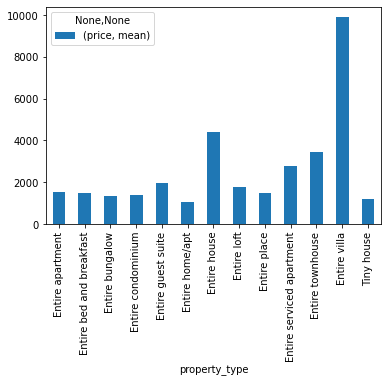

In [231]:
plt.clf()
df3.groupby('property_type').sum().plot(kind='bar')
plt.show()
#Can I sort them by price? 

In [249]:
df4 = Bangkok.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
df4.tail(10)

neighbourhood
Bang Rak          2,492.57
Pra Wet           2,568.88
Khlong San        2,606.34
Saphan Sung       2,992.50
Samphanthawong    3,038.76
Parthum Wan       3,577.21
Nong Chok         4,161.40
Lat Phrao         4,203.69
Khlong Sam Wa     4,365.33
Taling Chan      19,598.60
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

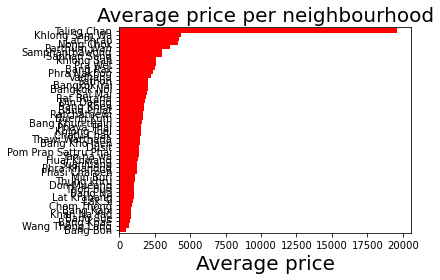

In [251]:
ax1=df4.plot.barh(color='r', width=1)
plt.title("Average price per neighbourhood", fontsize=20)
plt.xlabel('Average price', fontsize=20)
plt.ylabel("")
plt.tight_layout()
plt.show 
#It would be best to combine this graph and the previus graph in a stacked bar plot. I was unable to use the code you suggested. 

In [219]:
BKP = sns.catplot(x='property_type', y='price', kind='bar', data = df3, aspect=3)
BKP.set_xticklabels(rotation=90, horizontalalignment='center')
BKP.fig.suptitle('Preferred cities based on review score location')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [214]:
BKP=sns.catplot(x='property_type', y='price', kind ='bar', data= df3, aspect=2)
                                    #aspect: increase the width of your graph 
BKP.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues (House, Guesthouse,etc.)
BKP.fig.suptitle("Property Price in Bangkok, according to property type")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [196]:
SC = [['neighbourhood','property_type']]

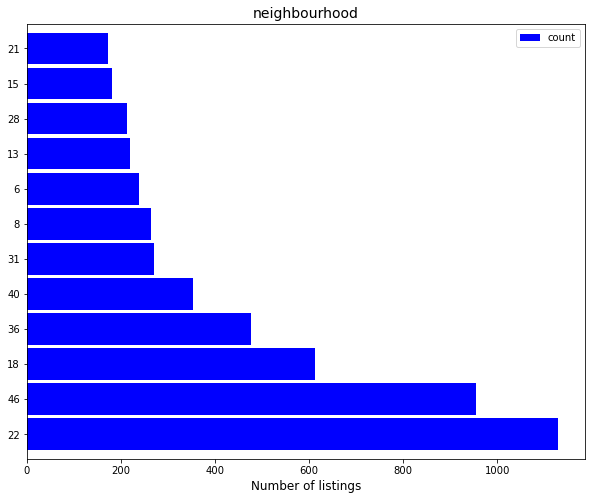

In [170]:
feq = Bangkok['neighbourhood'].sort_values(by='count', ascending=False)[:12]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.9)
plt.title('neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

In [176]:
BKHosts = Bangkok.groupby(['host_since']).mean()
print(BKHosts['price'])

KeyError: 'host_since'

In [ ]:
df = NoDup2.groupby(['city','property_type']).agg({'property_type':['count'],'price':['mean']}).reset_index() #Count property types per city, sort by review score 
Bangkok = df.loc[(df['city']=='Bangkok')]
Bangkok.head().stack(axis=1)


In [ ]:
BK = sns.catplot(x='property_type', y='price', kind ='bar', data= NoDup2, aspect=2)
BK.set_xticklabels(rotation=90, horizontalalignment='right')
BK.fig.suptitle("Property Price in Bankgkok, according to property type")

In [ ]:
#Since I am not only focusing on Bangkok, the time calculation would be only for Bangkok. Is it possible to find which neighboorhood has the highest % increase of hosts in the past 5 years? 